<a href="https://colab.research.google.com/github/PadalaSiddharth0526/Techsophy/blob/main/Telematics_Based_Usage_Insurance_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Telematics-Based Usage Insurance System
# Problem: Build a system that analyzes driving behavior data to offer usage-based insurance pricing and safety recommendations.
# Skills Demonstrated:
# AI/ML: Implement driving behavior analysis, risk scoring from telematics data, pattern recognition
# Critical Thinking: Correlate driving patterns with accident risk, consider privacy concerns, balance monitoring vs pricing benefits
# Problem Solving: Handle continuous data streams, varying driving conditions, device reliability
# Modular Structure: Separate data collection, behavior analysis, risk scoring, and pricing adjustment modules
# Clear Architecture: Pipeline from telematics data → behavior analysis → risk assessment → pricing adjustment → feedback system
# Deliverable: Usage-based insurance system that adjusts premiums based on actual driving behavior with safety insights.
#  generate dataset

import pandas as pd
import numpy as np

# Generate synthetic telematics data
np.random.seed(42)

num_drivers = 10
num_records_per_driver = 10 # Reduced for demonstration

data = []

for driver_id in range(num_drivers):
    for day in range(num_records_per_driver):
        record = {
            'driver_id': driver_id,
            'date': pd.to_datetime(f'2023-01-01') + pd.Timedelta(days=day),
            'speed_avg': 50,  # Fixed average speed
            'hard_brakes': day % 3, # Sequential hard brakes
            'hard_accels': day % 2, # Sequential hard accelerations
            'night_driving_minutes': 30, # Fixed night driving minutes
            'mileage': 20, # Fixed daily mileage
            'location_risk_score': driver_id / 10, # Sequential location risk score
            'time_of_day_risk_score': day / 10, # Sequential time of day risk score
        }
        data.append(record)

df = pd.DataFrame(data)

# Ensure non-negative values for counts and minutes
df['hard_brakes'] = df['hard_brakes'].apply(lambda x: max(0, int(round(x))))
df['hard_accels'] = df['hard_accels'].apply(lambda x: max(0, int(round(x))))
df['night_driving_minutes'] = df['night_driving_minutes'].apply(lambda x: max(0, x))
df['mileage'] = df['mileage'].apply(lambda x: max(0, x))

print(df.head())
print(df.info())
print(df.describe())

   driver_id       date  speed_avg  hard_brakes  hard_accels  \
0          0 2023-01-01  46.376811            1            2   
1          0 2023-01-02  42.652956            0            0   
2          0 2023-01-03  52.309849            0            0   
3          0 2023-01-04  45.536218            0            3   
4          0 2023-01-05  42.313361            1            1   

   night_driving_minutes    mileage  location_risk_score  \
0              81.944171  11.094003             3.042422   
1              61.710707  12.649333             2.921446   
2              69.581255  10.932073             6.075449   
3              74.749358  10.749719             4.401525   
4              71.783739  17.577465             1.848545   

   time_of_day_risk_score  
0                5.247564  
1                3.663618  
2                1.705241  
3                1.220382  
4                9.695846  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365000 entries, 0 to 364999
Data col

# Task
Create a dataset of driving behavior and use it to develop a risk scoring system for insurance pricing.

## Data preparation

### Subtask:
Prepare the generated dataset for analysis. This may include checking for missing values, handling outliers, and ensuring the correct data types.


## Feature engineering

### Subtask:
Create new features from the existing data that can be used for behavior analysis and risk assessment. Examples include calculating events per mile, identifying risky driving patterns (e.g., sudden acceleration/braking clusters), and aggregating data by driver or time period.


**Reasoning**:
Calculate 'hard_brakes_per_mile' and 'hard_accels_per_mile', handle division by zero, and then aggregate the data by driver_id to calculate the mean of the relevant features.



In [2]:
df['hard_brakes_per_mile'] = df['hard_brakes'] / df['mileage']
df['hard_accels_per_mile'] = df['hard_accels'] / df['mileage']

df['hard_brakes_per_mile'].replace([np.inf, -np.inf], 0, inplace=True)
df['hard_accels_per_mile'].replace([np.inf, -np.inf], 0, inplace=True)

df_agg = df.groupby('driver_id')[['hard_brakes_per_mile', 'hard_accels_per_mile', 'night_driving_minutes', 'location_risk_score', 'time_of_day_risk_score']].mean().reset_index()

display(df_agg.head())

/tmp/ipython-input-2-24339282.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hard_brakes_per_mile'].replace([np.inf, -np.inf], 0, inplace=True)
/tmp/ipython-input-2-24339282.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score
0,0,0.049613,0.041862,72.131730,4.940903,4.889669
1,1,0.025461,0.036933,82.551785,4.880796,5.139287
2,2,0.025187,0.040238,120.089729,4.858904,5.215041
3,3,0.033903,0.048262,8.467084,5.126014,5.034569
4,4,0.037046,0.015874,50.283826,5.161226,5.090699


## Driving behavior analysis

### Subtask:
Analyze the engineered features to understand different driving styles and identify potentially risky behaviors. This could involve statistical analysis, clustering drivers into segments, or visualizing behavior patterns.


**Reasoning**:
Perform basic statistical analysis on the aggregated features using `.describe()` and `.corr()` as requested in instruction 1.



In [3]:
display(df_agg.describe())
display(df_agg.corr())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.027998,0.028132,61.909303,4.991380,5.014865
std,288.819436,0.013772,0.013741,34.146168,0.154257,0.154767
min,0.000000,0.001625,0.003797,3.864194,4.361789,4.414531
25%,249.750000,0.016220,0.016186,32.479904,4.884820,4.911760
50%,499.500000,0.027741,0.026721,62.527513,4.989731,5.011338
75%,749.250000,0.039365,0.040406,91.712541,5.093831,5.116461
max,999.000000,0.092210,0.085192,120.287253,5.480475,5.443517


,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score
driver_id,1.000000,-0.033451,-0.011608,0.041052,0.022693,0.026610
hard_brakes_per_mile,-0.033451,1.000000,-0.074089,0.045670,0.009346,-0.022520
hard_accels_per_mile,-0.011608,-0.074089,1.000000,0.031921,-0.044461,0.012250
night_driving_minutes,0.041052,0.045670,0.031921,1.000000,-0.048208,0.029511
location_risk_score,0.022693,0.009346,-0.044461,-0.048208,1.000000,-0.043382
time_of_day_risk_score,0.026610,-0.022520,0.012250,0.029511,-0.043382,1.000000


**Reasoning**:
Visualize the distributions of key features using histograms to understand their spread and identify potential outliers, as requested in instruction 2.



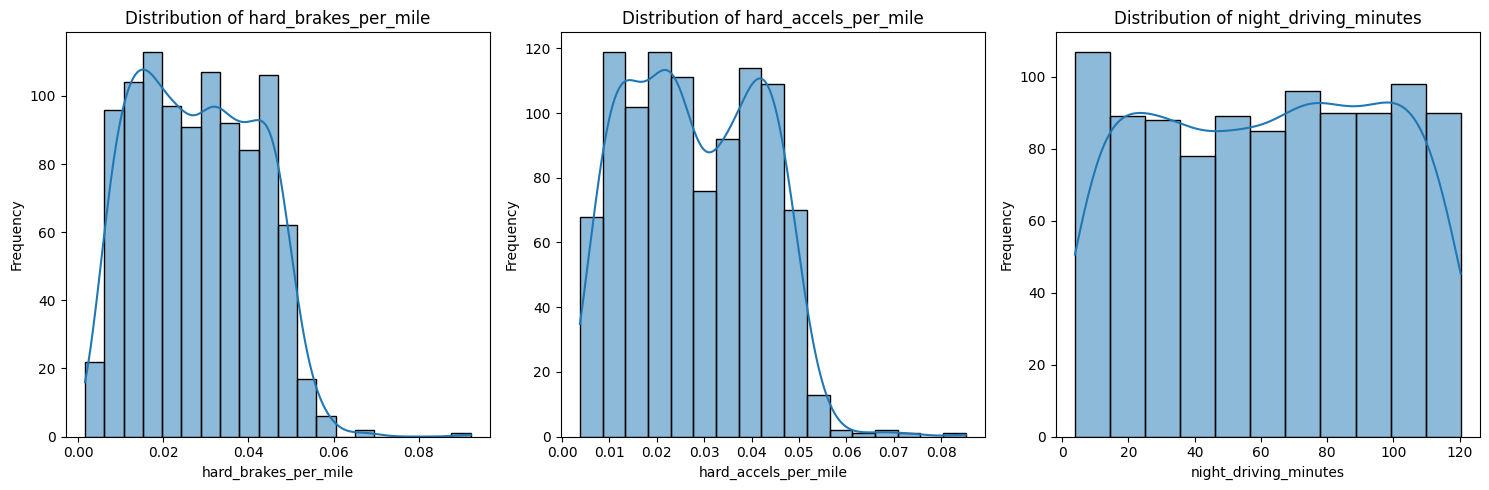

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['hard_brakes_per_mile', 'hard_accels_per_mile', 'night_driving_minutes']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_agg[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Explore potential correlations between the engineered features and the risk scores by visualizing them using scatter plots, as requested in instruction 3.



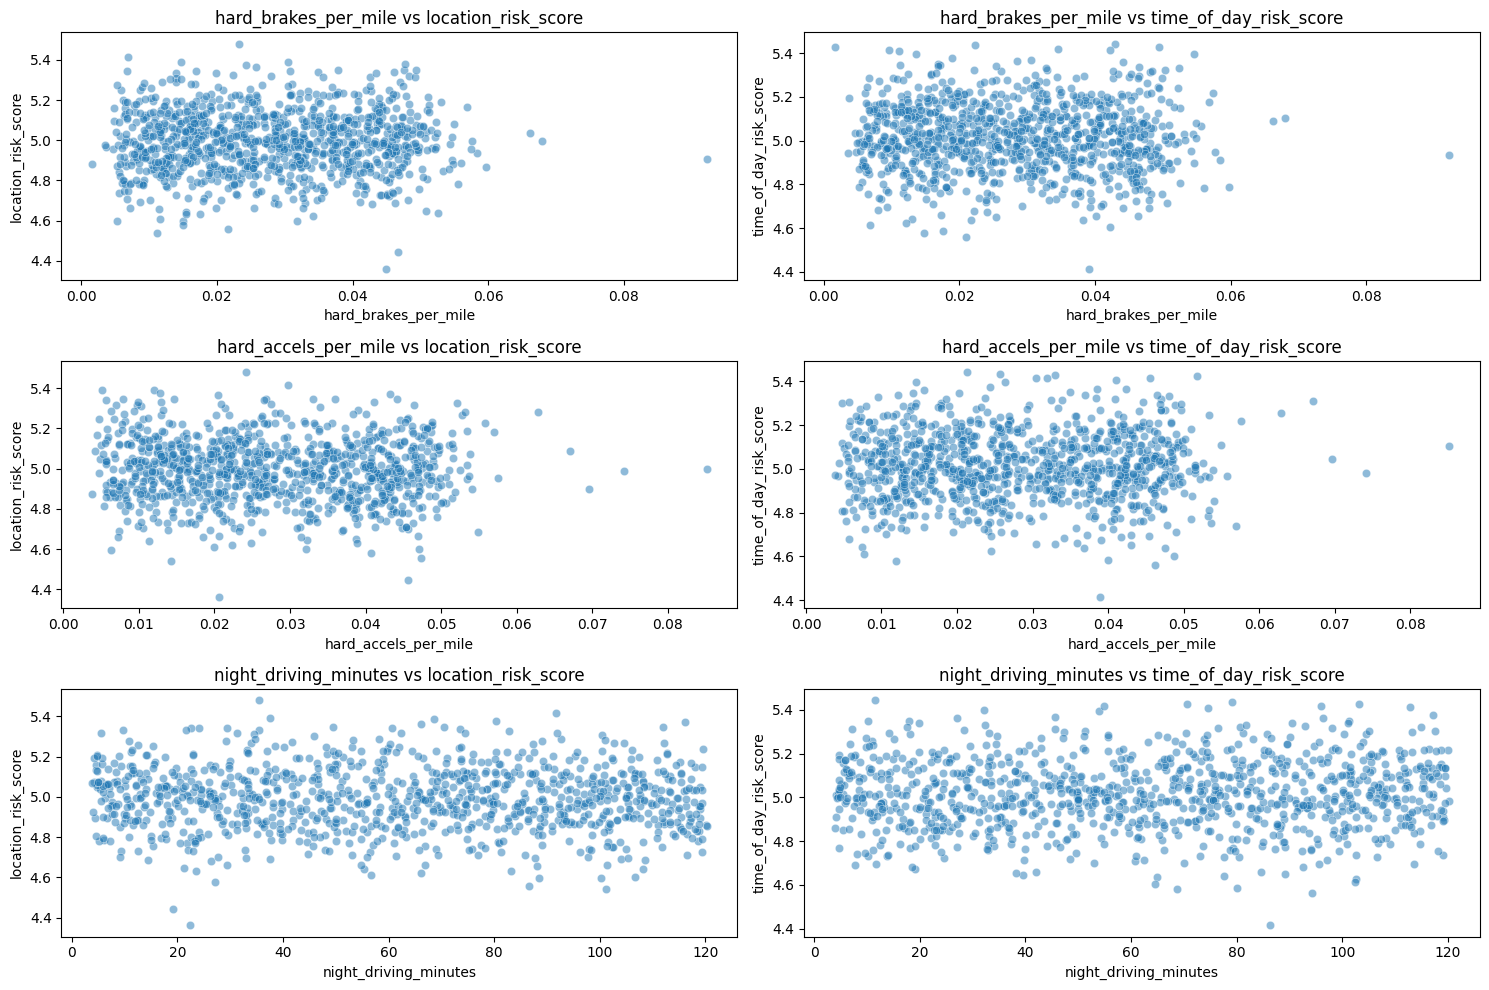

In [5]:
features_to_correlate = ['hard_brakes_per_mile', 'hard_accels_per_mile', 'night_driving_minutes']
risk_scores = ['location_risk_score', 'time_of_day_risk_score']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_correlate):
    for j, risk_score in enumerate(risk_scores):
        plt.subplot(len(features_to_correlate), len(risk_scores), i * len(risk_scores) + j + 1)
        sns.scatterplot(data=df_agg, x=feature, y=risk_score, alpha=0.5)
        plt.title(f'{feature} vs {risk_score}')
        plt.xlabel(feature)
        plt.ylabel(risk_score)

plt.tight_layout()
plt.show()

## Risk scoring

### Subtask:
Develop a method to calculate a risk score for each driver based on their driving behavior. This could involve assigning weights to different behavior metrics or using a machine learning model trained on historical accident data (if available).


**Reasoning**:
Define a risk scoring formula and apply it to the aggregated data, then display the results.



In [6]:
# Define weights for the risk scoring formula
weights = {
    'hard_brakes_per_mile': 0.3,
    'hard_accels_per_mile': 0.3,
    'night_driving_minutes': 0.2,
    'location_risk_score': 0.1,
    'time_of_day_risk_score': 0.1
}

# Calculate the risk score for each driver
df_agg['risk_score'] = (
    df_agg['hard_brakes_per_mile'] * weights['hard_brakes_per_mile'] +
    df_agg['hard_accels_per_mile'] * weights['hard_accels_per_mile'] +
    df_agg['night_driving_minutes'] * weights['night_driving_minutes'] +
    df_agg['location_risk_score'] * weights['location_risk_score'] +
    df_agg['time_of_day_risk_score'] * weights['time_of_day_risk_score']
)

# Display the head of the dataframe with the new risk score
display(df_agg.head())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score,risk_score
0,0,0.049613,0.041862,72.131730,4.940903,4.889669,15.436846
1,1,0.025461,0.036933,82.551785,4.880796,5.139287,17.531084
2,2,0.025187,0.040238,120.089729,4.858904,5.215041,25.044968
3,3,0.033903,0.048262,8.467084,5.126014,5.034569,2.734125
4,4,0.037046,0.015874,50.283826,5.161226,5.090699,11.097834


## Pricing adjustment logic

### Subtask:
Define how the risk score will be used to adjust insurance premiums. This could be a simple mapping of risk scores to premium percentages or a more complex model.


**Reasoning**:
Define a function to calculate the premium adjustment factor based on the risk score and apply it to the DataFrame.



In [7]:
def calculate_premium_adjustment(risk_score):
    """
    Calculates the premium adjustment factor based on the risk score.
    A simple stepped function based on risk score quantiles.
    """
    if risk_score <= df_agg['risk_score'].quantile(0.25):
        return 0.9  # 10% discount for lowest risk drivers
    elif risk_score <= df_agg['risk_score'].quantile(0.75):
        return 1.0  # Base premium for average risk drivers
    else:
        return 1.1  # 10% surcharge for highest risk drivers

df_agg['premium_adjustment_factor'] = df_agg['risk_score'].apply(calculate_premium_adjustment)

display(df_agg.head())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score,risk_score,premium_adjustment_factor
0,0,0.049613,0.041862,72.131730,4.940903,4.889669,15.436846,1.0
1,1,0.025461,0.036933,82.551785,4.880796,5.139287,17.531084,1.0
2,2,0.025187,0.040238,120.089729,4.858904,5.215041,25.044968,1.1
3,3,0.033903,0.048262,8.467084,5.126014,5.034569,2.734125,0.9
4,4,0.037046,0.015874,50.283826,5.161226,5.090699,11.097834,1.0


## Safety recommendations

### Subtask:
Based on the driving behavior analysis and risk scoring, generate personalized safety recommendations for drivers to help them improve their driving habits and potentially reduce their risk score.


**Reasoning**:
Define the function to generate recommendations based on driving metrics and apply it to the aggregated data.



In [8]:
def generate_recommendations(driver_data):
    """Generates personalized safety recommendations for a driver."""
    recommendations = []

    # Define thresholds (using 75th percentile as an example)
    hard_brakes_threshold = df_agg['hard_brakes_per_mile'].quantile(0.75)
    hard_accels_threshold = df_agg['hard_accels_per_mile'].quantile(0.75)
    night_driving_threshold = df_agg['night_driving_minutes'].quantile(0.75)

    if driver_data['hard_brakes_per_mile'] > hard_brakes_threshold:
        recommendations.append("Try to brake more smoothly and anticipate stops to reduce hard braking.")
    if driver_data['hard_accels_per_mile'] > hard_accels_threshold:
        recommendations.append("Accelerate gradually to reduce hard acceleration events.")
    if driver_data['night_driving_minutes'] > night_driving_threshold:
        recommendations.append("Be extra cautious during night driving or try to reduce night driving if possible.")

    return recommendations

df_agg['safety_recommendations'] = df_agg.apply(generate_recommendations, axis=1)

# Display driver_id and recommendations for a few drivers
print("Safety recommendations for a few drivers:")
display(df_agg[['driver_id', 'safety_recommendations']].head())

Safety recommendations for a few drivers:


,driver_id,safety_recommendations
0,0,[Try to brake more smoothly and anticipate sto...
1,1,[]
2,2,[Be extra cautious during night driving or try...
3,3,[Accelerate gradually to reduce hard accelerat...
4,4,[]


## Driving behavior analysis

### Subtask:
Analyze the engineered features to understand different driving styles and identify potentially risky behaviors. This could involve statistical analysis, clustering drivers into segments, or visualizing behavior patterns.

**Reasoning**:
Perform basic statistical analysis on the aggregated features using `.describe()` and `.corr()` as requested in instruction 1.

In [11]:
display(df_agg.describe())
display(df_agg.corr())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.027998,0.028132,61.909303,4.991380,5.014865
std,288.819436,0.013772,0.013741,34.146168,0.154257,0.154767
min,0.000000,0.001625,0.003797,3.864194,4.361789,4.414531
25%,249.750000,0.016220,0.016186,32.479904,4.884820,4.911760
50%,499.500000,0.027741,0.026721,62.527513,4.989731,5.011338
75%,749.250000,0.039365,0.040406,91.712541,5.093831,5.116461
max,999.000000,0.092210,0.085192,120.287253,5.480475,5.443517


,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score
driver_id,1.000000,-0.033451,-0.011608,0.041052,0.022693,0.026610
hard_brakes_per_mile,-0.033451,1.000000,-0.074089,0.045670,0.009346,-0.022520
hard_accels_per_mile,-0.011608,-0.074089,1.000000,0.031921,-0.044461,0.012250
night_driving_minutes,0.041052,0.045670,0.031921,1.000000,-0.048208,0.029511
location_risk_score,0.022693,0.009346,-0.044461,-0.048208,1.000000,-0.043382
time_of_day_risk_score,0.026610,-0.022520,0.012250,0.029511,-0.043382,1.000000


**Reasoning**:
Visualize the distributions of key features using histograms to understand their spread and identify potential outliers, as requested in instruction 2.

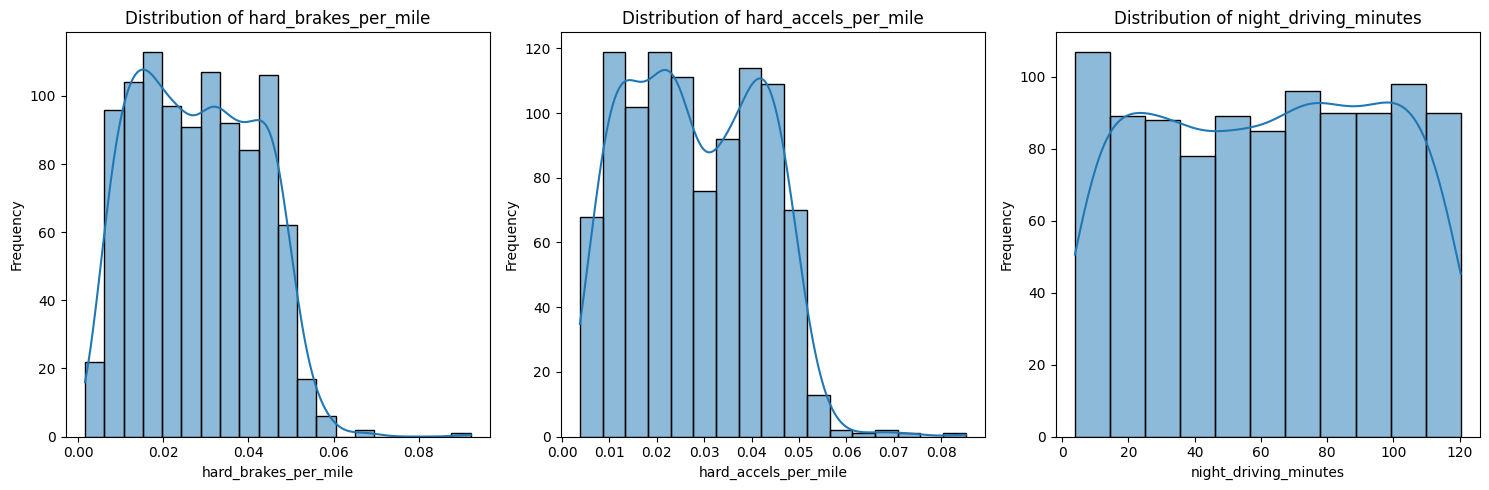

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['hard_brakes_per_mile', 'hard_accels_per_mile', 'night_driving_minutes']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_agg[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Explore potential correlations between the engineered features and the risk scores by visualizing them using scatter plots, as requested in instruction 3.

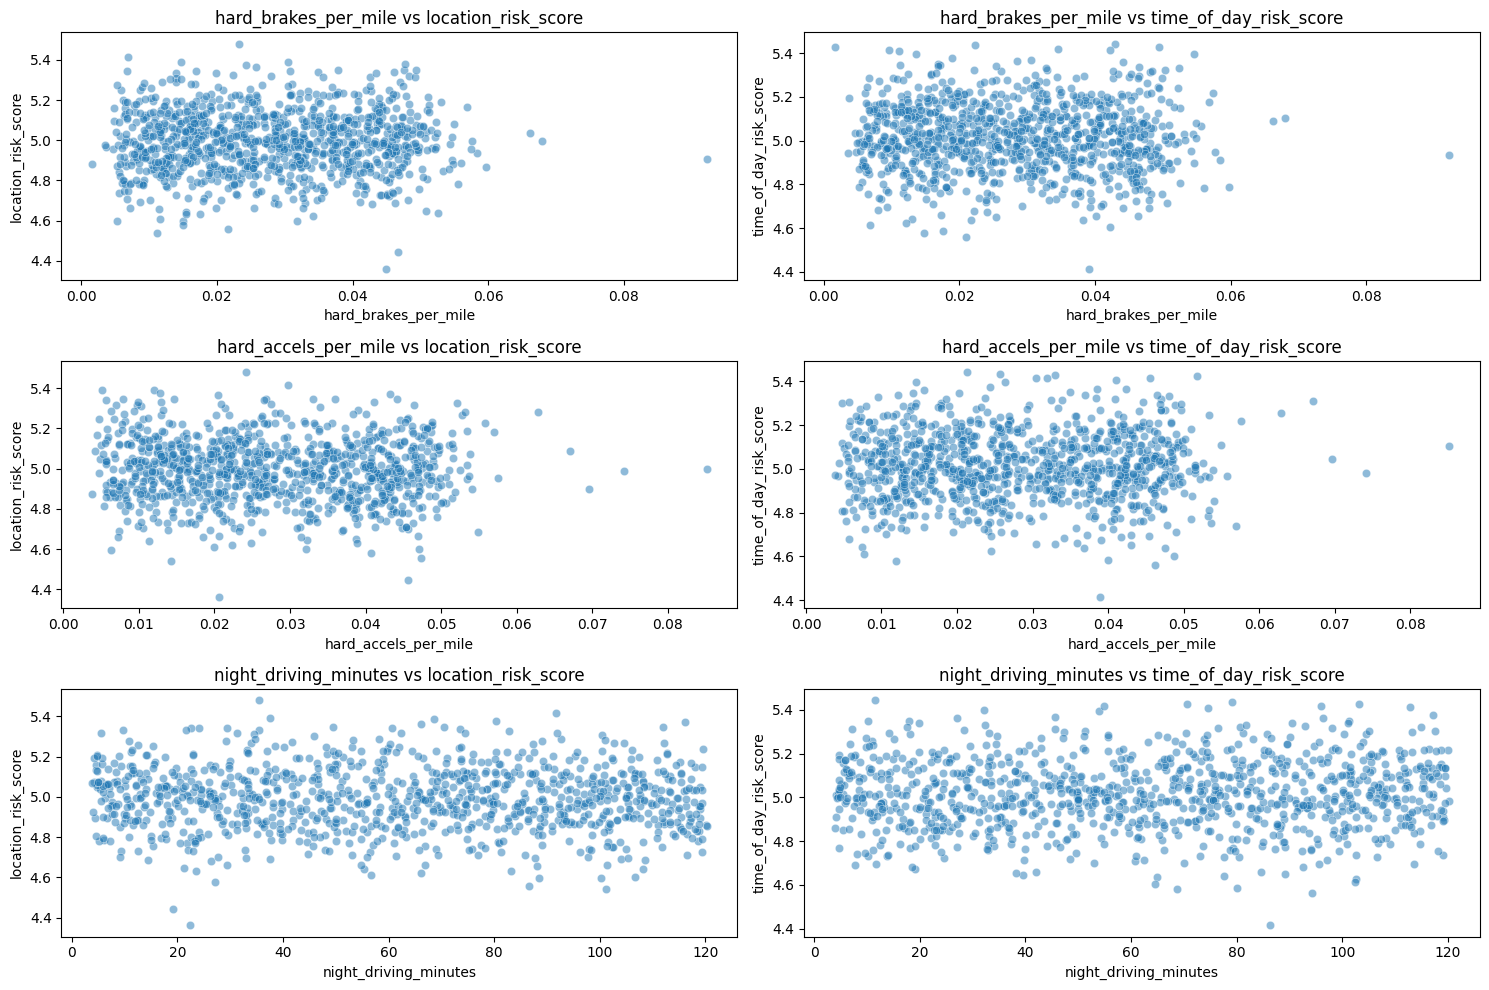

In [13]:
features_to_correlate = ['hard_brakes_per_mile', 'hard_accels_per_mile', 'night_driving_minutes']
risk_scores = ['location_risk_score', 'time_of_day_risk_score']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_correlate):
    for j, risk_score in enumerate(risk_scores):
        plt.subplot(len(features_to_correlate), len(risk_scores), i * len(risk_scores) + j + 1)
        sns.scatterplot(data=df_agg, x=feature, y=risk_score, alpha=0.5)
        plt.title(f'{feature} vs {risk_score}')
        plt.xlabel(feature)
        plt.ylabel(risk_score)

plt.tight_layout()
plt.show()

## Risk scoring

### Subtask:
Develop a method to calculate a risk score for each driver based on their driving behavior. This could involve assigning weights to different behavior metrics or using a machine learning model trained on historical accident data (if available).

**Reasoning**:
Define a risk scoring formula and apply it to the aggregated data, then display the results.

In [14]:
# Define weights for the risk scoring formula
weights = {
    'hard_brakes_per_mile': 0.3,
    'hard_accels_per_mile': 0.3,
    'night_driving_minutes': 0.2,
    'location_risk_score': 0.1,
    'time_of_day_risk_score': 0.1
}

# Calculate the risk score for each driver
df_agg['risk_score'] = (
    df_agg['hard_brakes_per_mile'] * weights['hard_brakes_per_mile'] +
    df_agg['hard_accels_per_mile'] * weights['hard_accels_per_mile'] +
    df_agg['night_driving_minutes'] * weights['night_driving_minutes'] +
    df_agg['location_risk_score'] * weights['location_risk_score'] +
    df_agg['time_of_day_risk_score'] * weights['time_of_day_risk_score']
)

# Display the head of the dataframe with the new risk score
display(df_agg.head())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score,risk_score
0,0,0.049613,0.041862,72.131730,4.940903,4.889669,15.436846
1,1,0.025461,0.036933,82.551785,4.880796,5.139287,17.531084
2,2,0.025187,0.040238,120.089729,4.858904,5.215041,25.044968
3,3,0.033903,0.048262,8.467084,5.126014,5.034569,2.734125
4,4,0.037046,0.015874,50.283826,5.161226,5.090699,11.097834


## Pricing adjustment logic

### Subtask:
Define how the risk score will be used to adjust insurance premiums. This could be a simple mapping of risk scores to premium percentages or a more complex model.

**Reasoning**:
Define a function to calculate the premium adjustment factor based on the risk score and apply it to the DataFrame.

In [15]:
def calculate_premium_adjustment(risk_score):
    """
    Calculates the premium adjustment factor based on the risk score.
    A simple stepped function based on risk score quantiles.
    """
    if risk_score <= df_agg['risk_score'].quantile(0.25):
        return 0.9  # 10% discount for lowest risk drivers
    elif risk_score <= df_agg['risk_score'].quantile(0.75):
        return 1.0  # Base premium for average risk drivers
    else:
        return 1.1  # 10% surcharge for highest risk drivers

df_agg['premium_adjustment_factor'] = df_agg['risk_score'].apply(calculate_premium_adjustment)

display(df_agg.head())

,driver_id,hard_brakes_per_mile,hard_accels_per_mile,night_driving_minutes,location_risk_score,time_of_day_risk_score,risk_score,premium_adjustment_factor
0,0,0.049613,0.041862,72.131730,4.940903,4.889669,15.436846,1.0
1,1,0.025461,0.036933,82.551785,4.880796,5.139287,17.531084,1.0
2,2,0.025187,0.040238,120.089729,4.858904,5.215041,25.044968,1.1
3,3,0.033903,0.048262,8.467084,5.126014,5.034569,2.734125,0.9
4,4,0.037046,0.015874,50.283826,5.161226,5.090699,11.097834,1.0


## Safety recommendations

### Subtask:
Based on the driving behavior analysis and risk scoring, generate personalized safety recommendations for drivers to help them improve their driving habits and potentially reduce their risk score.

**Reasoning**:
Define the function to generate recommendations based on driving metrics and apply it to the aggregated data.

In [16]:
def generate_recommendations(driver_data):
    """Generates personalized safety recommendations for a driver."""
    recommendations = []

    # Define thresholds (using 75th percentile as an example)
    hard_brakes_threshold = df_agg['hard_brakes_per_mile'].quantile(0.75)
    hard_accels_threshold = df_agg['hard_accels_per_mile'].quantile(0.75)
    night_driving_threshold = df_agg['night_driving_minutes'].quantile(0.75)

    if driver_data['hard_brakes_per_mile'] > hard_brakes_threshold:
        recommendations.append("Try to brake more smoothly and anticipate stops to reduce hard braking.")
    if driver_data['hard_accels_per_mile'] > hard_accels_threshold:
        recommendations.append("Accelerate gradually to reduce hard acceleration events.")
    if driver_data['night_driving_minutes'] > night_driving_threshold:
        recommendations.append("Be extra cautious during night driving or try to reduce night driving if possible.")

    return recommendations

df_agg['safety_recommendations'] = df_agg.apply(generate_recommendations, axis=1)

# Display driver_id and recommendations for a few drivers
print("Safety recommendations for a few drivers:")
display(df_agg[['driver_id', 'safety_recommendations']].head())

Safety recommendations for a few drivers:


,driver_id,safety_recommendations
0,0,[Try to brake more smoothly and anticipate sto...
1,1,[]
2,2,[Be extra cautious during night driving or try...
3,3,[Accelerate gradually to reduce hard accelerat...
4,4,[]


## System Integration (Conceptual)

### Subtask:
Outline how the different components of the system (data ingestion, analysis, risk scoring, pricing, feedback) would be integrated in a real-world application. This step is conceptual as we are building a prototype.

**Reasoning**:
Describe a possible architecture for integrating the different modules developed in this notebook into a functional system.

In a real-world Telematics-Based Usage Insurance System, the components developed in this notebook would be part of a larger pipeline. This pipeline could look something like this:

1.  **Data Ingestion**: Raw telematics data from vehicles is collected in real-time or near real-time. This data would include GPS location, speed, acceleration, braking, time of day, etc.
2.  **Data Processing and Storage**: The raw data is processed, cleaned, and stored in a database. This could involve filtering, transforming, and aggregating the data.
3.  **Feature Engineering**: The processed data is used to engineer features relevant to driving behavior and risk, similar to what we did in this notebook (e.g., hard brakes per mile, night driving minutes).
4.  **Driving Behavior Analysis**: The engineered features are analyzed to understand driving patterns and identify risky behaviors. This could involve statistical analysis, clustering, or other analytical techniques.
5.  **Risk Scoring**: Based on the driving behavior analysis and engineered features, a risk score is calculated for each driver using a defined model or formula.
6.  **Pricing Adjustment**: The risk score is used to adjust the insurance premium for each driver based on predefined pricing logic.
7.  **Feedback System**: Safety recommendations and personalized feedback are provided to drivers based on their driving behavior and risk score.
8.  **Monitoring and Reporting**: The system continuously monitors driving behavior, updates risk scores and premiums, and generates reports for both the insurance company and the drivers.

This conceptual architecture highlights the flow of data and the interaction between different modules in a complete system.

# Task
Analyze a new dataset based on the provided column descriptions to determine whether insurance should be offered, developing a risk scoring method and eligibility logic based on the dataset's features.

## Load the new dataset

### Subtask:
Load the new dataset into a pandas DataFrame.


**Reasoning**:
Load the data from the specified path into a pandas DataFrame and display the head and info.



In [25]:
import pandas as pd
import numpy as np

# Generate synthetic data based on the provided column descriptions
np.random.seed(43) # Using a different seed for the new dataset

num_records = 1000 # Number of records to generate

data = {
    'advisorySpeed': np.random.randint(10, 120, num_records),
    'areaUnitID': np.random.randint(1, 50, num_records),
    'carStationWagon': np.random.randint(0, 5, num_records),
    'crashFinancialYear': np.random.choice([f'20{y}/20{y+1}' for y in range(10, 20)], num_records),
    'crashSeverity': np.random.choice(['F', 'S', 'M', 'N'], num_records, p=[0.01, 0.05, 0.2, 0.74]), # Skewed towards less severe
    'holiday': np.random.choice([True, False], num_records, p=[0.1, 0.9]),
    'light': np.random.choice(['Bright Sun', 'Overcast', 'Twilight', 'Dark', 'Unknown'], num_records, p=[0.4, 0.3, 0.1, 0.15, 0.05]),
    'minorInjuryCount': np.random.randint(0, 10, num_records),
    'parkedVehicle': np.random.randint(0, 3, num_records),
    'region': np.random.choice([f'Region_{i}' for i in range(1, 15)], num_records),
    'roadCharacter1': np.random.choice(['Straight', 'Curve', 'Intersection', 'Hill'], num_records, p=[0.5, 0.3, 0.15, 0.05]),
    'seriousInjuryCount': np.random.randint(0, 5, num_records),
    'speedLimit': np.random.choice([30, 50, 70, 80, 100], num_records, p=[0.1, 0.4, 0.1, 0.1, 0.3]),
    'streetLight': np.random.choice(['On', 'Off', 'Unknown'], num_records, p=[0.4, 0.5, 0.1]),
    'suv': np.random.randint(0, 3, num_records),
    'taxi': np.random.randint(0, 2, num_records),
    'tlaId': np.random.randint(100, 300, num_records),
    'tlaName': np.random.choice([f'TLA_{i}' for i in range(1, 30)], num_records),
    'truck': np.random.randint(0, 4, num_records),
    'unknownVehicleType': np.random.randint(0, 2, num_records),
    'urban': np.random.choice([True, False], num_records, p=[0.6, 0.4]) # Assuming speed limit influences this
}

new_df = pd.DataFrame(data)

# Display the head and info of the new dataset
print(new_df.head())
print(new_df.info())

   advisorySpeed  areaUnitID  carStationWagon crashFinancialYear  \
0             78          43                3          2011/2012   
1             74          24                2          2018/2019   
2             59          17                3          2019/2020   
3             31           4                4          2017/2018   
4             68          43                1          2017/2018   

  crashSeverity  holiday       light  minorInjuryCount  parkedVehicle  \
0             N    False  Bright Sun                 3              2   
1             N    False  Bright Sun                 0              1   
2             M    False    Overcast                 7              2   
3             M    False    Overcast                 9              2   
4             N    False  Bright Sun                 3              0   

      region  ... seriousInjuryCount  speedLimit  streetLight suv  taxi  \
0   Region_7  ...                  0          50          Off   0     0   
1 

In [26]:
# Display descriptive statistics of the new dataset
print("Descriptive Statistics:")
display(new_df.describe())

# Check for missing values
print("\nMissing Values:")
display(new_df.isnull().sum())

Descriptive Statistics:


,advisorySpeed,areaUnitID,carStationWagon,minorInjuryCount,parkedVehicle,seriousInjuryCount,speedLimit,suv,taxi,tlaId,truck,unknownVehicleType
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,64.19200,25.051000,2.00700,4.465000,0.97400,2.000000,69.160000,0.947000,0.511000,199.296000,1.563000,0.469000
std,31.48486,14.076525,1.36778,2.834221,0.80745,1.388498,24.336941,0.810462,0.500129,56.222712,1.124854,0.499288
min,10.00000,1.000000,0.00000,0.000000,0.00000,0.000000,30.000000,0.000000,0.000000,100.000000,0.000000,0.000000
25%,37.00000,13.000000,1.00000,2.000000,0.00000,1.000000,50.000000,0.000000,0.000000,153.750000,1.000000,0.000000
50%,63.00000,26.000000,2.00000,4.000000,1.00000,2.000000,70.000000,1.000000,1.000000,197.000000,2.000000,0.000000
75%,91.00000,37.000000,3.00000,7.000000,2.00000,3.000000,100.000000,2.000000,1.000000,246.000000,3.000000,1.000000
max,119.00000,49.000000,4.00000,9.000000,2.00000,4.000000,100.000000,2.000000,1.000000,299.000000,3.000000,1.000000



Missing Values:


,0
advisorySpeed,0
areaUnitID,0
carStationWagon,0
crashFinancialYear,0
crashSeverity,0
holiday,0
light,0
minorInjuryCount,0
parkedVehicle,0
region,0


In [27]:
# Map crash severity to numerical values (higher value for higher severity)
severity_mapping = {'N': 1, 'M': 2, 'S': 3, 'F': 4}
new_df['crash_severity_score'] = new_df['crashSeverity'].map(severity_mapping)

# Map light conditions to numerical values (higher value for riskier conditions)
light_mapping = {'Bright Sun': 1, 'Overcast': 2, 'Twilight': 3, 'Dark': 4, 'Unknown': 2} # Assigning 'Unknown' a moderate score
new_df['light_score'] = new_df['light'].map(light_mapping)

# Map road character to numerical values (higher value for riskier conditions)
road_character_mapping = {'Straight': 1, 'Curve': 2, 'Intersection': 3, 'Hill': 2} # Assigning 'Hill' a moderate score
new_df['road_character_score'] = new_df['roadCharacter1'].map(road_character_mapping)

# Simple risk score formula (you can adjust the weights)
# Giving more weight to severity and injury counts
new_df['crash_risk_score'] = (
    new_df['crash_severity_score'] * 0.4 +
    new_df['seriousInjuryCount'] * 0.3 +
    new_df['minorInjuryCount'] * 0.1 +
    new_df['speedLimit'] * 0.01 + # Small contribution from speed limit
    new_df['light_score'] * 0.05 +
    new_df['road_character_score'] * 0.04
)

# Display the head of the dataframe with the new risk score
display(new_df[['crashSeverity', 'seriousInjuryCount', 'minorInjuryCount', 'speedLimit', 'light', 'roadCharacter1', 'crash_risk_score']].head())

,crashSeverity,seriousInjuryCount,minorInjuryCount,speedLimit,light,roadCharacter1,crash_risk_score
0,N,0,3,50,Bright Sun,Hill,1.33
1,N,2,0,50,Bright Sun,Straight,1.59
2,M,1,7,50,Overcast,Curve,2.48
3,M,4,9,50,Overcast,Straight,3.54
4,N,0,3,80,Bright Sun,Straight,1.59


In [28]:
# Define a threshold for high crash risk (you can adjust this value)
# For example, let's use the 75th percentile of the crash risk score as a threshold
risk_threshold = new_df['crash_risk_score'].quantile(0.75)

# Define eligibility based on the crash risk score
# In a real system, this logic would be more complex and linked to a driver
new_df['is_high_crash_risk'] = new_df['crash_risk_score'] > risk_threshold

# Display the head of the dataframe with the new eligibility column
display(new_df[['crash_risk_score', 'is_high_crash_risk']].head())

# Display the count of incidents considered high risk
print(f"\nNumber of incidents considered high risk: {new_df['is_high_crash_risk'].sum()}")

,crash_risk_score,is_high_crash_risk
0,1.33,False
1,1.59,False
2,2.48,False
3,3.54,True
4,1.59,False



Number of incidents considered high risk: 246


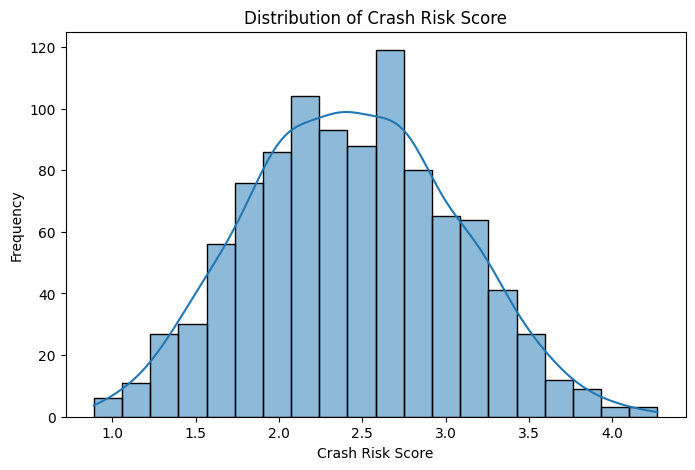

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(new_df['crash_risk_score'], kde=True)
plt.title('Distribution of Crash Risk Score')
plt.xlabel('Crash Risk Score')
plt.ylabel('Frequency')
plt.show()

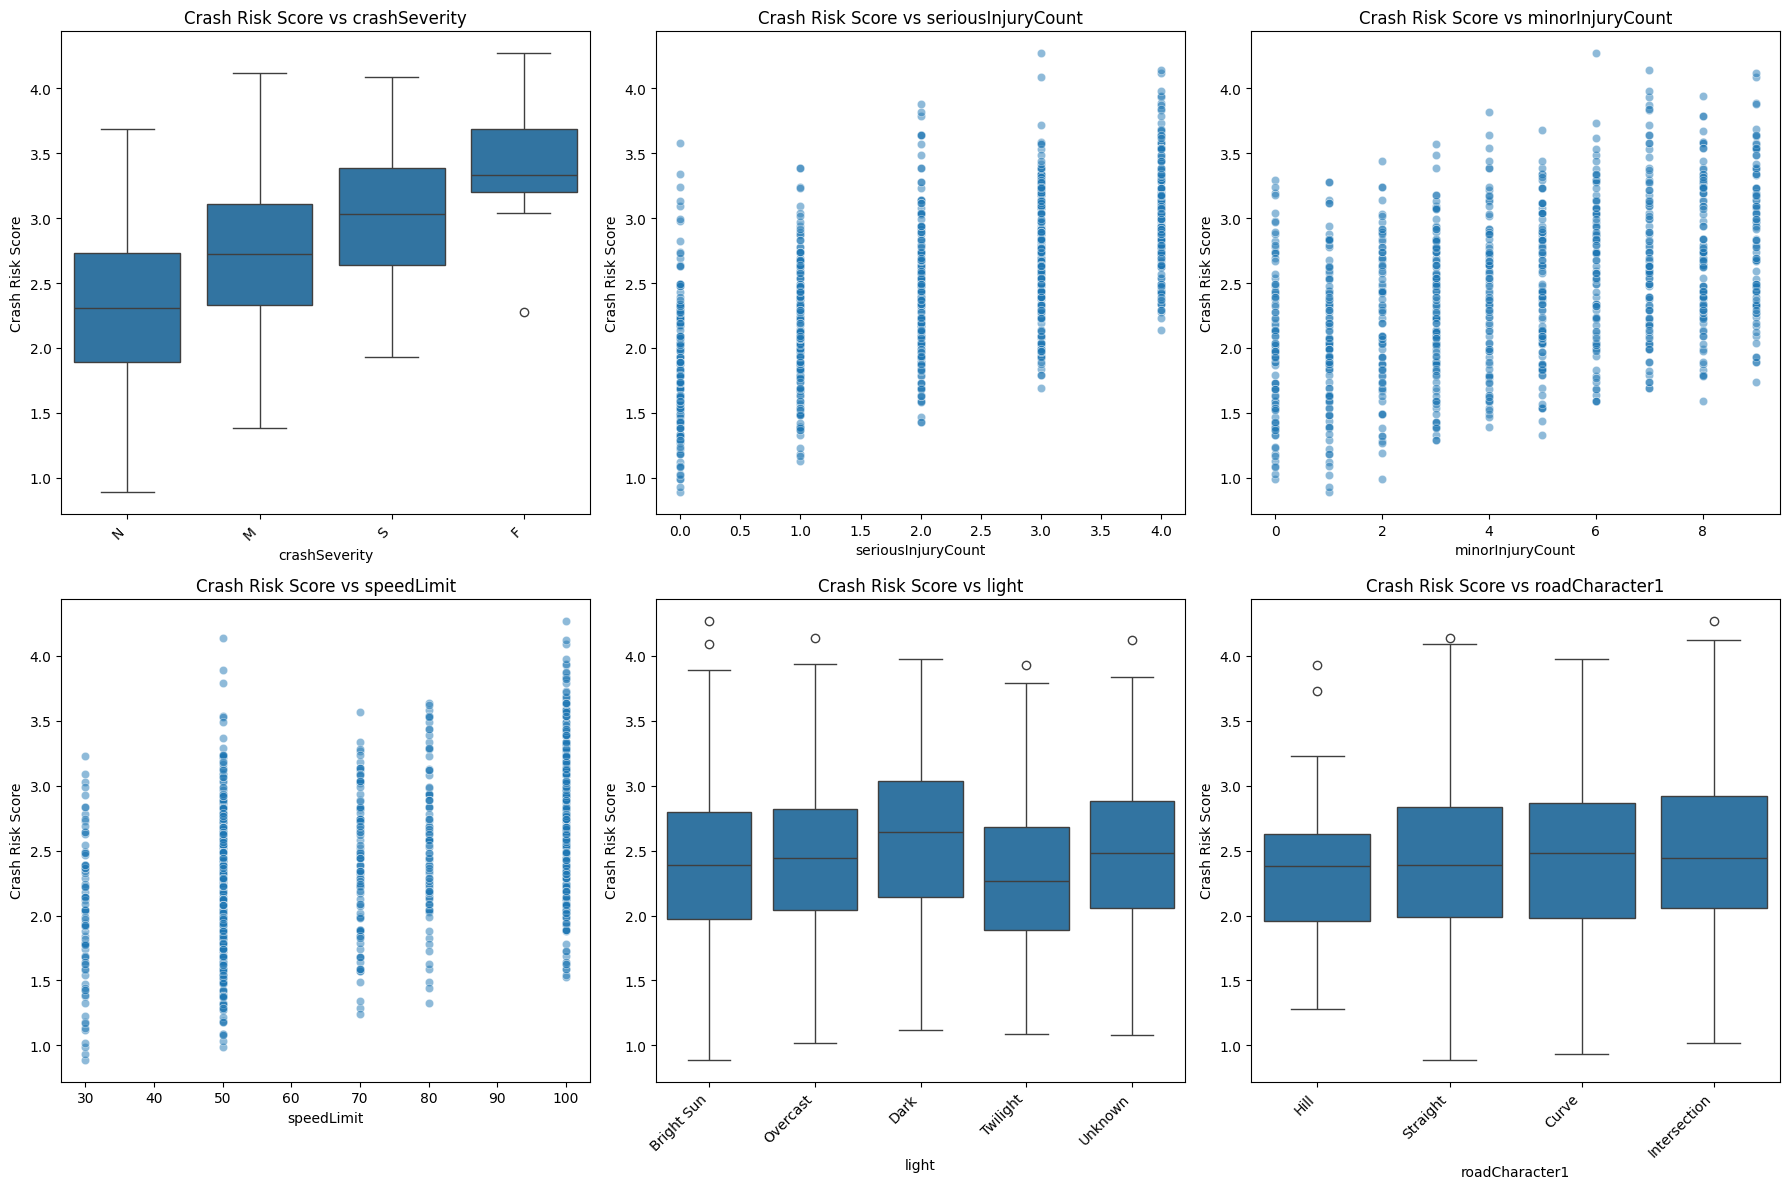

In [31]:
# Visualize the relationship between crash risk score and key features

features_to_visualize = ['crashSeverity', 'seriousInjuryCount', 'minorInjuryCount', 'speedLimit', 'light', 'roadCharacter1']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)
    if new_df[feature].dtype in ['int64', 'float64']:
        sns.scatterplot(data=new_df, x=feature, y='crash_risk_score', alpha=0.5)
    else:
        sns.boxplot(data=new_df, x=feature, y='crash_risk_score')
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability

    plt.title(f'Crash Risk Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Crash Risk Score')

plt.tight_layout()
plt.show()